In [24]:
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

# Histograms

plot histograms of coincidences in clean_data folder

In [57]:
path='cleaned_data/l_state_measured_on_lr_basis_coincidences_clean.txt'
sns.set_theme(style='white', font_scale=2)
df = pd.read_csv(path, usecols=['time', 'channel'], dtype={'time': np.float128, 'channel': np.int64})

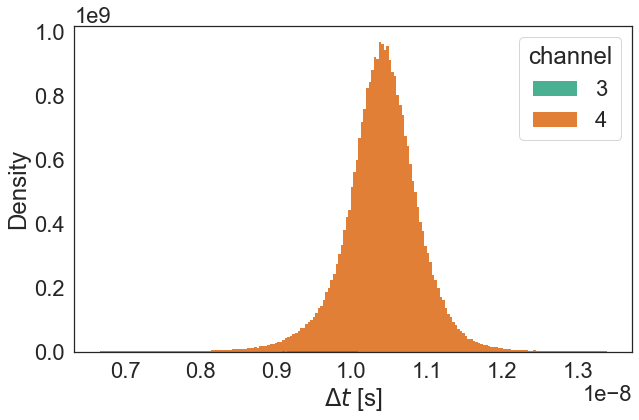

In [58]:
fig,ax=plt.subplots(figsize=(10,6))
sns.histplot(data = df, x = 'time', ax=ax, hue = 'channel', alpha=0.8, lw=0,
            bins=200, palette='Dark2', stat='density')
ax.set_xlabel(r'$\Delta t$ [s]')
figpath = 'coincidences/'+path[12:-10]+'_hist.pdf'
fig.savefig(figpath, bbox_inches='tight')

# Security parameter
plot for security folder

In [27]:
sec = pd.read_csv('security/security_tomo.csv').drop(columns=['Unnamed: 0'])
err = pd.read_csv('security/security_err_tomo.csv').drop(columns=['Unnamed: 0'])
trsec = pd.read_csv('security/security_trusted.csv').drop(columns=['Unnamed: 0'])
errtr = pd.read_csv('security/security_err_trusted.csv').drop(columns=['Unnamed: 0'])
imagepath='security/security_tomo_trusted.pdf'

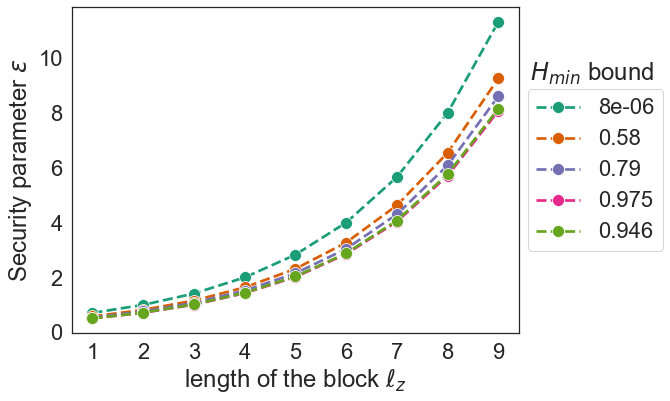

In [37]:
fig,ax=plt.subplots(figsize=(8,6))
sns.set_theme(style='white',palette='Dark2',font_scale=2)
lw=2.7
ms=12
ls='--'
for h in sec.columns[:len(sec.columns)-1]:
    g=sns.lineplot(data=sec, x='length', y=h, ax=ax, lw=lw, label=h,
                marker='o', markersize=ms, linestyle=ls)
    # ax.errorbar(x=sec['length'], y=sec[h], yerr=err[h], color='blue', ecolor='black', 
    #             lw = 0, elinewidth=4, uplims=True, lolims=True, fmt='.k')

for h in trsec.columns[:len(trsec.columns)-1]:
    g=sns.lineplot(data=trsec, x='length', y=h, ax=ax, lw=lw, label=h,
                marker='o', markersize=ms, linestyle=ls)

g.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)
ax.set_ylabel(r"Security parameter $\epsilon$")
ax.set_xlabel(r"length of the block $\ell_z$")
ax.set_xticks(np.arange(1,10,1))
fig.text(.92, 0.71, r"$H_{min}$ bound")
fig.savefig(imagepath, bbox_inches='tight')

#  density matrices

In [29]:
path = 'results/d_densitymatrix.txt'
rho = np.loadtxt(path, dtype = complex).reshape(2,2)

/opt/anaconda3/lib/python3.8/site-packages/qiskit/quantum_info/operators/pauli.py:107: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  z = np.zeros(len(label), dtype=np.bool)
/opt/anaconda3/lib/python3.8/site-packages/qiskit/quantum_info/operators/pauli.py:108: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.zeros(len(label), dtype=np.bool)
/opt

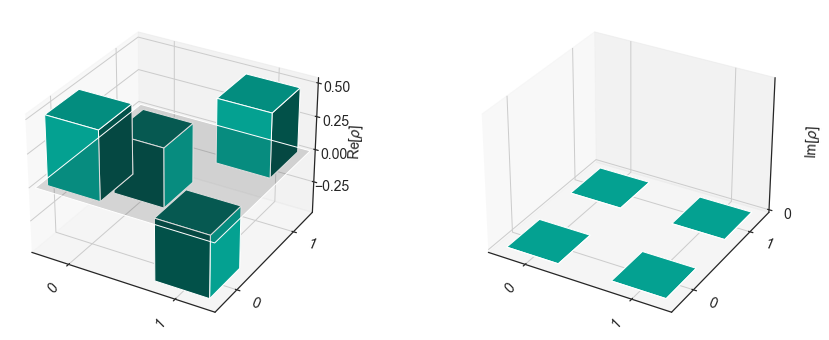

In [30]:
from qiskit.visualization import plot_state_city
%matplotlib inline

#state_city plot
fig=plt.figure(figsize=(15,6))
sns.set_theme(style='white',palette='Dark2',font_scale=2 )
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

plot_state_city(rho, color=['#04A191', '#04A191'], ax_real=ax1, ax_imag=ax2)

import os
if os.path.isdir('density_matrix')==False:
     os.mkdir('density_matrix')
figpath = 'density_matrix/density_'+path[8:-18]+'.pdf'
fig.savefig(figpath, bbox_inches='tight')


# Vectors on the Bloch sphere

In [ ]:
def state (ph=0.5, pv=0.5, pa=0.5, pd=0.5, pr=0, pl=1):
    import qutip

    b=qutip.Bloch()

    #line individuated by ph
    N=200
    z=ph*np.ones(N)
    x=np.linspace(-0.8,0.8,N)
    y=[np.sqrt(1-u**2-v**2) for u, v in zip(x,z)]
    pnts = [x, y, z]
    b.add_points(pnts)
    y=[-np.sqrt(1-u**2-v**2) for u, v in zip(x,z)]
    pnts = [x, y, z]
    b.add_points(pnts)

    y=np.linspace(-0.8,0.8,N)
    x=[np.sqrt(1-u**2-v**2) for u, v in zip(y,z)]
    pnts = [x, y, z]
    b.add_points(pnts)
    x=[-np.sqrt(1-u**2-v**2) for u, v in zip(y,z)]
    pnts = [x, y, z]
    b.add_points(pnts)

    #line individuated by pv
    z=-pv*np.ones(N)
    x=np.linspace(-0.8,0.8,N)
    y=[np.sqrt(1-u**2-v**2) for u, v in zip(x,z)]
    pnts = [x, y, z]
    b.add_points(pnts)
    y=[-np.sqrt(1-u**2-v**2) for u, v in zip(x,z)]
    pnts = [x, y, z]
    b.add_points(pnts)
    
    y=np.linspace(-0.8,0.8,N)
    x=[np.sqrt(1-u**2-v**2) for u, v in zip(y,z)]
    pnts = [x, y, z]
    b.add_points(pnts)
    x=[-np.sqrt(1-u**2-v**2) for u, v in zip(y,z)]
    pnts = [x, y, z]
    b.add_points(pnts)


    #line individuated by pa
    N=200
    x=pd*np.ones(N)
    z=np.linspace(-0.8,0.8,N)
    y=[np.sqrt(1-u**2-v**2) for u, v in zip(z,x)]
    pnts = [x, y, z]
    b.add_points(pnts)
    y=[-np.sqrt(1-u**2-v**2) for u, v in zip(z,x)]
    pnts = [x, y, z]
    b.add_points(pnts)

    y=np.linspace(-0.8,0.8,N)
    z=[np.sqrt(1-u**2-v**2) for u, v in zip(y,x)]
    pnts = [x, y, z]
    b.add_points(pnts)
    z=[-np.sqrt(1-u**2-v**2) for u, v in zip(y,x)]
    pnts = [x, y, z]
    b.add_points(pnts)

    #line individuated by pa
    N=200
    x=-pa*np.ones(N)
    y=np.linspace(-0.8,0.8,N)
    z=[np.sqrt(1-u**2-v**2) for u, v in zip(x,y)]
    pnts = [x, y, z]
    b.add_points(pnts)
    z=[-np.sqrt(1-u**2-v**2) for u, v in zip(x,y)]
    pnts = [x, y, z]
    b.add_points(pnts)

    z=np.linspace(-0.8,0.8,N)
    y=[np.sqrt(1-u**2-v**2) for u, v in zip(z,x)]
    pnts = [x, y, z]
    b.add_points(pnts)
    y=[-np.sqrt(1-u**2-v**2) for u, v in zip(z,x)]
    pnts = [x, y, z]
    b.add_points(pnts)

    ltheta=2*np.arccos(1/np.sqrt(2))
    lphi= -np.arcsin(1/np.sqrt(2)*1/np.sin(ltheta/2))
    lvector = [np.sin(ltheta)*np.cos(lphi), np.sin(ltheta)*np.sin(lphi), np.cos(ltheta)]
    b.add_vectors(lvector)


    npo = 5
    b.point_color=['b','b','b','b','b','b','b','b',\
                    'r','r','r','r', 'r', 'r','r','r', 
                    'g', 'g', 'g','g','g','g', 'g', 'g']
    b.point_marker=['o', 'o', 'o', 'o']
    b.vector_color =['black']
    b.point_size=0.1*np.ones(npo)
    b.zlabel =[r'$|H\rangle$', r'$|V\rangle$']
    b.xlabel =[r'$|D\rangle$', r'$|A\rangle$']
    b.ylabel =[r'$|R\rangle$', r'$|L\rangle$']
    b.view = [40, -30]
    b.
    b.make_sphere()
    b.show()

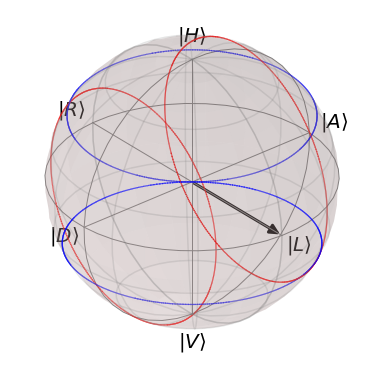

In [ ]:
state()

/opt/anaconda3/lib/python3.8/site-packages/qiskit/quantum_info/operators/symplectic/pauli_table.py:927: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  symp = np.zeros(2 * num_qubits, dtype=np.bool)
/opt/anaconda3/lib/python3.8/site-packages/qiskit/quantum_info/operators/symplectic/pauli_table.py:824: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arr

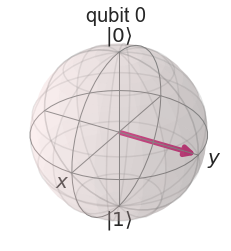

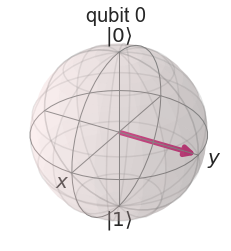

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
%matplotlib inline

state = [1/np.sqrt(2), complex(0,1)*1/np.sqrt(2)]
plot_bloch_multivector(state)

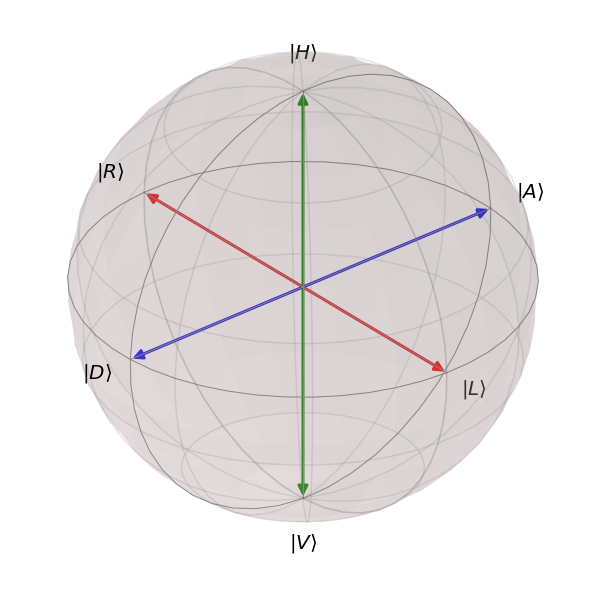

In [ ]:
import qutip
fig = plt.figure(figsize=(8,8))
b=qutip.Bloch()
b.add_vectors([0,-1,0])
b.add_vectors([0,1,0])
b.add_vectors([0,0,1])
b.add_vectors([0,0,-1])
b.add_vectors([-1,0,0])
b.add_vectors([1,0,0])
b.vector_color = ['r','r','g','g','b','b']
b.zlabel =[r'$|H\rangle$', r'$|V\rangle$']
b.xlabel =[r'$|D\rangle$', r'$|A\rangle$']
b.ylabel =[r'$|R\rangle$', r'$|L\rangle$']
b.view = [40, -30]
b.fig = fig
b.make_sphere()
b.show()
fig.savefig('polarization_states.pdf', bbox_inches='tight')